In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import unicodedata
import numpy as np

In [3]:
df_mulheres_negras = pd.read_csv("homicidios-mulheres-negras.csv", sep=";")
df_homens_negros = pd.read_csv("homicidios-homens-negros.csv", sep=";") 

In [4]:
# Concatenar as duas bases
df_total = pd.concat([df_mulheres_negras, df_homens_negros])

# Somar os valores agrupando por cod, nome e período
df_soma = df_total.groupby(["cod", "nome", "período"], as_index=False)["valor"].sum()

# Mostrar resultado
print(df_soma)



     cod nome  período  valor
0     11   RO     1996      0
1     11   RO     1997     51
2     11   RO     1998    112
3     11   RO     1999    168
4     11   RO     2000    252
..   ...  ...      ...    ...
751   53   DF     2019    375
752   53   DF     2020    326
753   53   DF     2021    304
754   53   DF     2022    269
755   53   DF     2023    240

[756 rows x 4 columns]


     cod nome  período  valor
26    11   RO     2022    460
54    12   AC     2022    201
82    13   AM     2022   1552
110   14   RR     2022    166
138   15   PA     2022   2619
166   16   AP     2022    344
194   17   TO     2022    376
222   21   MA     2022   1739
250   22   PI     2022    691
278   23   CE     2022   2781
306   24   RN     2022   1029
334   25   PB     2022    906
362   26   PE     2022   2842
390   27   AL     2022   1101
418   28   SE     2022    728
446   29   BA     2022   6259
474   31   MG     2022   1967
502   32   ES     2022    916
530   33   RJ     2022   2813
558   35   SP     2022   1574
586   41   PR     2022   1048
614   42   SC     2022    153
642   43   RS     2022    491
670   50   MS     2022    343
698   51   MT     2022    821
726   52   GO     2022   1330
754   53   DF     2022    269


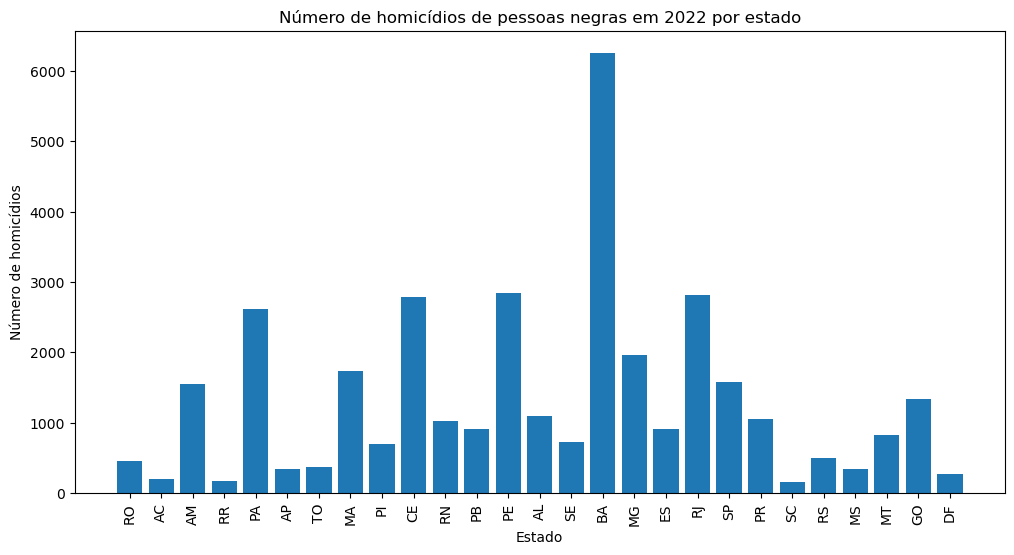

In [5]:
# Filtrar apenas o ano de 2022
df_2022 = df_soma[df_soma["período"] == 2022]

# Mostrar resultado
print(df_2022)

# Exemplo de visualização gráfica (barras)
plt.figure(figsize=(12,6))
plt.bar(df_2022["nome"], df_2022["valor"])
plt.xticks(rotation=90)
plt.title("Número de homicídios de pessoas negras em 2022 por estado")
plt.xlabel("Estado")
plt.ylabel("Número de homicídios")
plt.show()

In [6]:
# Criar os dados manualmente
dados_censo = {
    "estado": [
        "Bahia", "Pará", "Maranhão", "Amapá", "Piauí", "Tocantins", "Acre", "Sergipe",
        "Amazonas", "Ceará", "Alagoas", "Rondônia", "Mato Grosso", "Pernambuco", 
        "Roraima", "Paraíba", "Goiás", "Espírito Santo", "Rio Grande do Norte", 
        "Distrito Federal", "Minas Gerais", "Rio de Janeiro", "Brasil", 
        "Mato Grosso do Sul", "São Paulo", "Paraná", "Santa Catarina", 
        "Rio Grande do Sul"
    ],
    "pop_total": [
        14141626, 8120131, 6776699, 733759, 3271199, 1511460, 830018, 2210004,
        3941613, 8794957, 3127683, 1581196, 3658649, 9058931, 636707, 3974687,
        7056495, 3833712, 3302729, 2817381, 20539989, 16055174, 203080756,
        2757013, 44411238, 11444380, 7610361, 10882965
    ],
    "pop_negra": [
        11268655, 6467067, 5353442, 565637, 2521542, 1138654, 620975, 1645464,
        2905285, 6286667, 2186574, 1073501, 2409480, 5916359, 413689, 2524452,
        4471424, 2338483, 1983709, 1672601, 12038028, 9276993, 112739744,
        1472898, 18183257, 3925818, 1772896, 2306194
    ],
    "perc_negra": [
        79.7, 79.6, 79.0, 77.1, 77.0, 75.3, 74.8, 74.4,
        73.7, 71.4, 69.9, 67.9, 65.9, 65.3, 65.0, 63.5,
        63.4, 61.0, 60.0, 59.3, 58.6, 57.8, 55.5,
        53.4, 41.0, 34.3, 23.3, 21.2
    ]
}

# Criar DataFrame
df_censo = pd.DataFrame(dados_censo)

# Salvar em CSV
df_censo.to_csv("censo_2022_pop_negra.csv", index=False, encoding="utf-8")

# Mostrar primeiras linhas
print(df_censo.head())

     estado  pop_total  pop_negra  perc_negra
0     Bahia   14141626   11268655        79.7
1      Pará    8120131    6467067        79.6
2  Maranhão    6776699    5353442        79.0
3     Amapá     733759     565637        77.1
4     Piauí    3271199    2521542        77.0


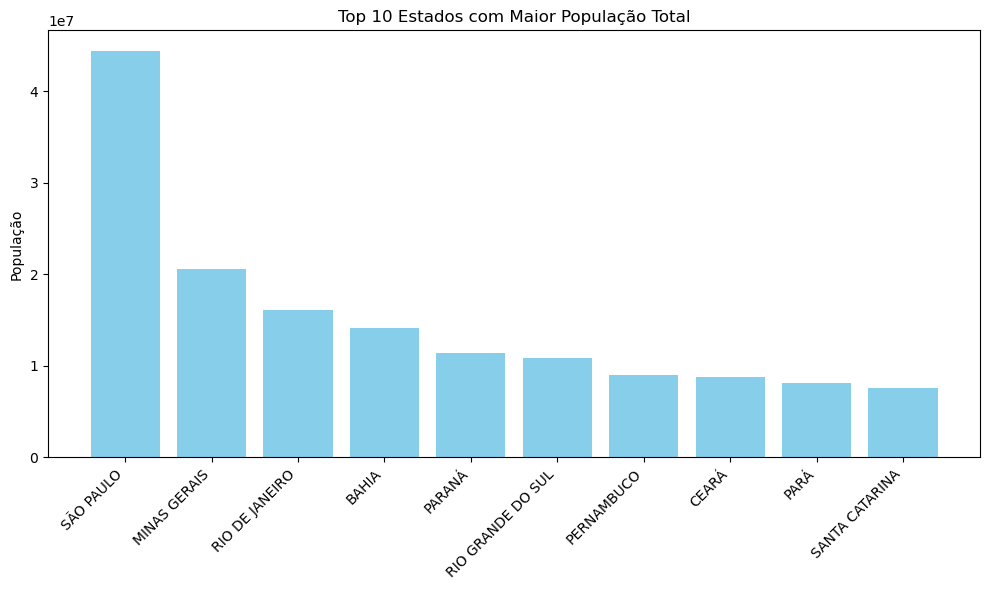

In [28]:
# --- Gráfico 1: Top 10 estados com maior população total ---
top10_total = df_censo.sort_values("pop_total", ascending=False).head(10)
plt.figure(figsize=(10,6))
plt.bar(top10_total["estado"], top10_total["pop_total"], color="skyblue")
plt.xticks(rotation=45, ha="right")
plt.title("Top 10 Estados com Maior População Total")
plt.ylabel("População")
plt.tight_layout()
plt.show()


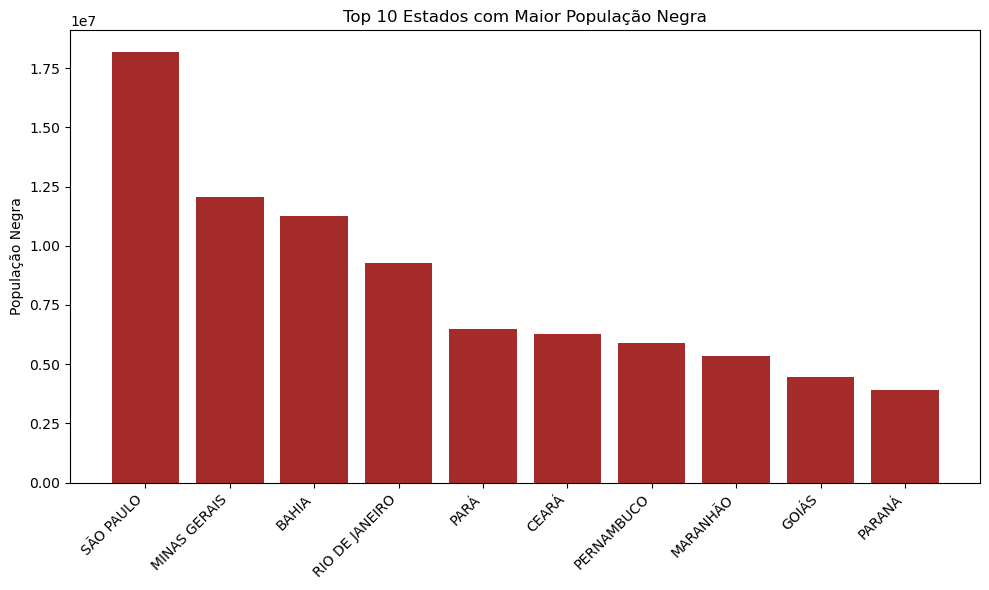

In [29]:
# --- Gráfico 2: Top 10 estados com maior população negra ---
top10_negra = df_censo.sort_values("pop_negra", ascending=False).head(10)
plt.figure(figsize=(10,6))
plt.bar(top10_negra["estado"], top10_negra["pop_negra"], color="brown")
plt.xticks(rotation=45, ha="right")
plt.title("Top 10 Estados com Maior População Negra")
plt.ylabel("População Negra")
plt.tight_layout()
plt.show()

In [8]:
# Criar os dados manualmente
dados_pib = {
    "posicao": list(range(1, 28)),
    "estado": [
        "São Paulo", "Rio de Janeiro", "Minas Gerais", "Paraná", "Rio Grande do Sul", 
        "Santa Catarina", "Bahia", "Distrito Federal", "Goiás", "Mato Grosso", 
        "Pernambuco", "Pará", "Ceará", "Espírito Santo", "Mato Grosso do Sul", 
        "Amazonas", "Maranhão", "Rio Grande do Norte", "Paraíba", "Alagoas", 
        "Piauí", "Rondônia", "Tocantins", "Sergipe", "Acre", "Amapá", "Roraima"
    ],
    "pib_mil_reais": [
        3130333000, 1153512000, 906731000, 614611000, 593634000,
        466274000, 402647000, 328790000, 318586000, 255527000,
        245828000, 236142000, 213601000, 182549000, 166407000,
        145140000, 139789000, 93819000, 86094000, 76066000,
        72835000, 66795000, 58209000, 57372000, 23676000,
        23614000, 21095000
    ],
    "variacao": [
        "Aumento", "Aumento", "Baixa", "Estável", "Baixa",
        "Baixa", "Aumento", "Aumento", "Aumento", "Baixa",
        "Baixa", "Baixa", "Baixa", "Baixa", "Aumento",
        "Baixa", "Estável", "Estável", "Estável", "Estável",
        "Estável", "Aumento", "Estável", "Estável", "Estável",
        "Estável", "Estável"
    ],
    "participacao_percentual": [
        31.1, 11.4, 9.0, 6.1, 5.9,
        4.6, 4.0, 3.3, 3.2, 2.5,
        2.4, 2.3, 2.1, 1.8, 1.7,
        1.4, 1.4, 0.9, 0.9, 0.8,
        0.7, 0.7, 0.6, 0.6, 0.2,
        0.2, 0.2
    ]
}

# Criar DataFrame
df_pib = pd.DataFrame(dados_pib)

# Salvar em CSV
df_pib.to_csv("pib_estados_2022.csv", index=False, encoding="utf-8")

# Mostrar primeiras linhas
print(df_pib.head())

   posicao             estado  pib_mil_reais variacao  participacao_percentual
0        1          São Paulo     3130333000  Aumento                     31.1
1        2     Rio de Janeiro     1153512000  Aumento                     11.4
2        3       Minas Gerais      906731000    Baixa                      9.0
3        4             Paraná      614611000  Estável                      6.1
4        5  Rio Grande do Sul      593634000    Baixa                      5.9


In [27]:
# --- Juntar e calcular percentual ---
df = pd.merge(df_pop, df_pop_negra, on="estado")
df["percentual_negros"] = (df["pop_negra"] / df["pop_total"]) * 100

NameError: name 'df_pop_negra' is not defined

## Será que os estados com pib menor apresenta mais pessoas negras?:

In [7]:
# Carregar os CSVs já criados
df_pib = pd.read_csv("pib_estados_2022.csv")
df_censo = pd.read_csv("censo_2022_pop_negra.csv")

# Conferir dados
print(df_pib.head())
print(df_censo.head())

   posicao             estado  pib_mil_reais variacao  participacao_percentual
0        1          São Paulo     3130333000  Aumento                     31.1
1        2     Rio de Janeiro     1153512000  Aumento                     11.4
2        3       Minas Gerais      906731000    Baixa                      9.0
3        4             Paraná      614611000  Estável                      6.1
4        5  Rio Grande do Sul      593634000    Baixa                      5.9
     estado  pop_total  pop_negra  perc_negra
0     Bahia   14141626   11268655        79.7
1      Pará    8120131    6467067        79.6
2  Maranhão    6776699    5353442        79.0
3     Amapá     733759     565637        77.1
4     Piauí    3271199    2521542        77.0


In [8]:
# Padronizar nomes dos estados (caso necessário)
df_pib["estado"] = df_pib["estado"].str.upper()
df_censo["estado"] = df_censo["estado"].str.upper()

# Fazer merge
df_merge = pd.merge(df_pib, df_censo, on="estado", how="inner")

print(df_merge.head())


   posicao             estado  pib_mil_reais variacao  \
0        1          SÃO PAULO     3130333000  Aumento   
1        2     RIO DE JANEIRO     1153512000  Aumento   
2        3       MINAS GERAIS      906731000    Baixa   
3        4             PARANÁ      614611000  Estável   
4        5  RIO GRANDE DO SUL      593634000    Baixa   

   participacao_percentual  pop_total  pop_negra  perc_negra  
0                     31.1   44411238   18183257        41.0  
1                     11.4   16055174    9276993        57.8  
2                      9.0   20539989   12038028        58.6  
3                      6.1   11444380    3925818        34.3  
4                      5.9   10882965    2306194        21.2  


In [9]:
# Correlação numérica
correlacao = df_merge["pib_mil_reais"].corr(df_merge["pop_negra"])
print("Correlação entre PIB e população negra:", correlacao)


Correlação entre PIB e população negra: 0.8225084097497806


### PIB absoluto vs número de negros

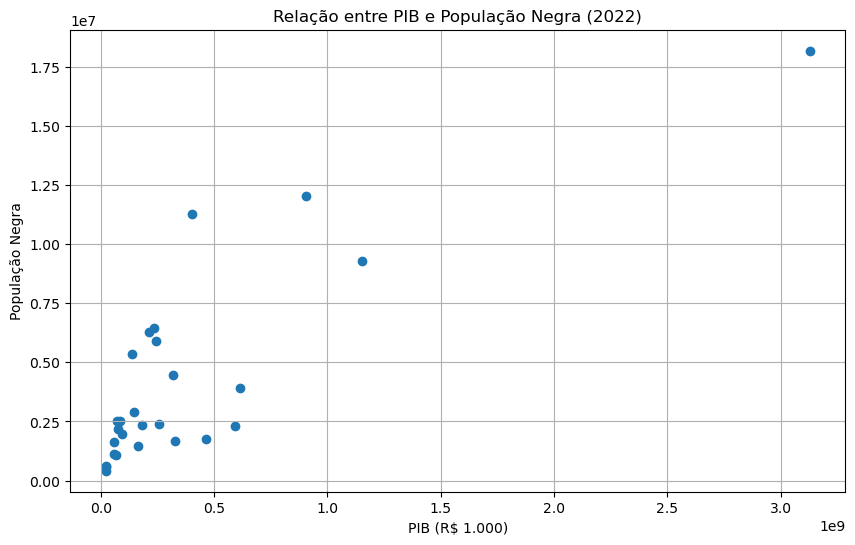

In [10]:
plt.figure(figsize=(10,6))
plt.scatter(df_merge["pib_mil_reais"], df_merge["pop_negra"])
plt.title("Relação entre PIB e População Negra (2022)")
plt.xlabel("PIB (R$ 1.000)")
plt.ylabel("População Negra")
plt.grid(True)
plt.show()

### PIB per capita vs % negros: Às vezes é mais justo comparar PIB per capita e % da população negra, ao invés do número absoluto de negros (já que SP tem PIB enorme e também mais gente).

Correlação entre PIB per capita e % da população negra: -0.5184118661499084


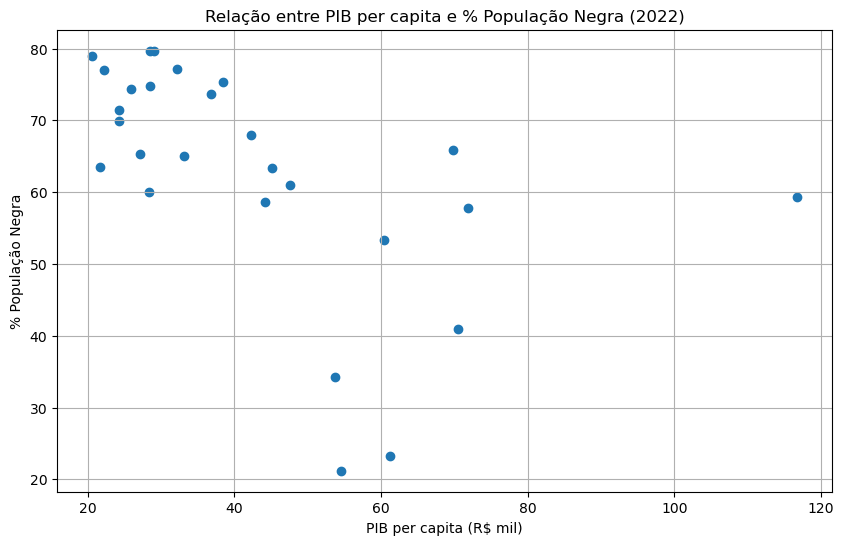

In [11]:
# PIB per capita
df_merge["pib_per_capita"] = df_merge["pib_mil_reais"] / df_merge["pop_total"]

# Correlação com percentual negro
correlacao_perc = df_merge["pib_per_capita"].corr(df_merge["perc_negra"])
print("Correlação entre PIB per capita e % da população negra:", correlacao_perc)

# Gráfico
plt.figure(figsize=(10,6))
plt.scatter(df_merge["pib_per_capita"], df_merge["perc_negra"])
plt.title("Relação entre PIB per capita e % População Negra (2022)")
plt.xlabel("PIB per capita (R$ mil)")
plt.ylabel("% População Negra")
plt.grid(True)
plt.show()


# Resultado:

## 1. PIB absoluto x População Negra

Correlação = 0.82 (forte e positiva)

Isso significa que estados com PIB maior tendem a ter mais pessoas negras em números absolutos.

Mas cuidado: isso reflete mais o tamanho da população total do estado do que uma relação direta entre PIB e presença negra (exemplo: SP e RJ têm PIB alto e também muitas pessoas negras, mas porque são estados populosos).

📊 O primeiro gráfico mostra bem isso: os pontos mais altos à direita são estados grandes (SP, BA, MG), puxando a correlação para cima.

## 2. PIB per capita x % da População Negra

Correlação = -0.51 (moderada e negativa)

Isso indica que quanto maior o PIB per capita, menor a porcentagem de negros na população do estado.

Ou seja: estados mais pobres concentram, proporcionalmente, mais população negra.

📊 O segundo gráfico confirma:

Estados do Nordeste e Norte (PIB per capita mais baixo) estão no topo (maior % de negros).

Estados do Sul e Sudeste (PIB per capita mais alto) ficam mais embaixo (menor % de negros).

## 3. Resposta à hipótese

### Sua hipótese era: "Será que os estados com PIB menor apresentam mais pessoas negras?"

Se olharmos em números absolutos de população negra: ❌ Não.

Estados ricos e populosos também têm muitas pessoas negras (exemplo: SP).

Se olharmos em proporção da população negra (% do total): ✅ Sim.

Estados com PIB per capita mais baixo tendem a ter maior percentual de população negra.

👉 Então a interpretação científica pode ser escrita assim:

"Embora os estados de maior PIB concentrem também grandes populações negras em números absolutos, a análise proporcional mostra que a população negra é 
relativamente mais numerosa nos estados de menor PIB per capita. Isso indica uma correlação negativa moderada (-0,51) entre PIB per capita e proporção 
de população negra, sugerindo que a desigualdade econômica no Brasil também se expressa racialmente."

# Os homicídios eles ocorrem em estados com mais população negra?

In [16]:
# 1. Já temos df_2022 com homicídios totais em 2022 por estado
print(df_2022.head())


     cod nome  período  valor nome_norm
26    11   RO     2022    460        RO
54    12   AC     2022    201        AC
82    13   AM     2022   1552        AM
110   14   RR     2022    166        RR
138   15   PA     2022   2619        PA


In [18]:
# 2. Padronizar nome dos estados
# Filtrar apenas o ano de 2022 (fazendo cópia para evitar SettingWithCopyWarning)
df_2022 = df_soma[df_soma["período"] == 2022].copy()

# Agora pode padronizar tranquilo
df_2022["nome"] = df_2022["nome"].str.upper()
df_censo["estado"] = df_censo["estado"].str.upper()


In [19]:
# 3. Juntar homicídios com censo
df_homi_pop = pd.merge(df_2022, df_censo, left_on="nome", right_on="estado", how="inner")

In [21]:
# 4. Calcular taxa de homicídios por 100 mil pessoas negras
df_homi_pop["taxa_homi_negros"] = (df_homi_pop["valor"] / df_homi_pop["pop_negra"]) * 100000

print(df_homi_pop[["estado", "valor", "pop_negra", "taxa_homi_negros"]].head())

Empty DataFrame
Columns: [estado, valor, pop_negra, taxa_homi_negros]
Index: []


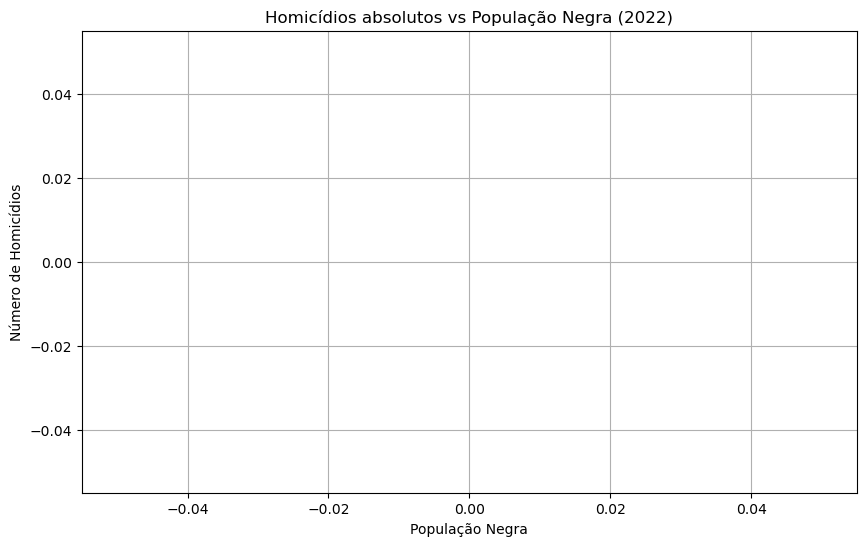

In [22]:
# 5. Gráfico: homicídios absolutos x população negra
plt.figure(figsize=(10,6))
plt.scatter(df_homi_pop["pop_negra"], df_homi_pop["valor"])
plt.title("Homicídios absolutos vs População Negra (2022)")
plt.xlabel("População Negra")
plt.ylabel("Número de Homicídios")
plt.grid(True)
plt.show()